In [19]:
import pandas as pd


In [18]:
d1 = pd.read_excel('/content/data-latest.xlsx', header=0)

In [23]:
d1=d1.dropna()

In [34]:
d2 = pd.read_excel('/content/EDGARv8.0_FT2022_GHG_booklet_2023.xlsx', sheet_name='GHG_totals_by_country', dtype=str)
d2 = d2.dropna()


In [37]:
d2 = d2[['Country', 2018, 2019, 2020, 2021, 2022]]


In [40]:
d1.shape,d2.shape

((11, 45), (212, 6))

In [43]:
md=pd.merge(d1,d2,left_on='Jurisdiction covered',right_on='Country')

In [47]:
md = pd.merge(d1, d2, left_on='Jurisdiction covered', right_on='Country', how='inner')


In [49]:
md.head(10)

,Unique ID,Instrument name,Type,Status,Jurisdiction covered,Share of jurisdiction emissions covered,Share of global emissions covered,Price on 1 April,2019_x,2020_x,...,Coverage,Pricing and allocation,Compliance,Relation to other instruments,Country,2018_y,2019_y,2020_y,2021_y,2022_y
0,Tax_FI,Finland carbon tax,National Carbon tax,Implemented in 1990,Finland,0.450,0.000459,€93.02 (US$99.99)*,77.0,77.0,...,The Finland carbon tax applies to direct and i...,Fixed Price,Upstream: Distributors and importers of the fo...,EU ETS and carbon taxation partly overlap in F...,Finland,68.008766026264,63.948057923915,58.141924982026,57.395198940375,54.805048213165
1,Tax_SL,Slovenia Carbon tax,National Carbon tax,Implemented in 1996,Slovenia,0.457,0.000155,€17.30 (US$18.60),17.3,17.3,...,The Carbon tax covers the Scope 1 emissions of...,The price is set by the Government,Upstream: Distributors and importers of covere...,Installations covered by the EU ETS are exempt...,Slovenia,19.942342991923,19.48175094726,18.118195702812,18.677164950767,18.275811537835
2,Tax_EE,Estonia carbon tax,National Carbon tax,Implemented in 2000,Estonia,0.100,0.000026,€2 (US$2.15),2.0,2.0,...,The Estonia carbon tax applies to direct (scop...,The price is set by the Government,Point source: Users of the fossil fuels covere...,Thermal energy generators covered under the EU...,Estonia,26.621944626852,18.883123470142,14.63258386188,14.730195130416,13.809327685697
3,ETS_NZ,New Zealand ETS,National ETS,Implemented in 2008,New Zealand,0.480,0.000738,NZ$59 (US$35.11),25.7,24.0,...,"The NZ ETS applies to GHG emissions (CO2, CH4,...",COST CONTAINMENT RESERVE: If a predetermined t...,Upstream: The point of regulation of the NZ ET...,The NZ ETS is not linked with any other system...,New Zealand,87.715676071025,88.884056138084,85.208681980486,85.140306124311,82.720400773954


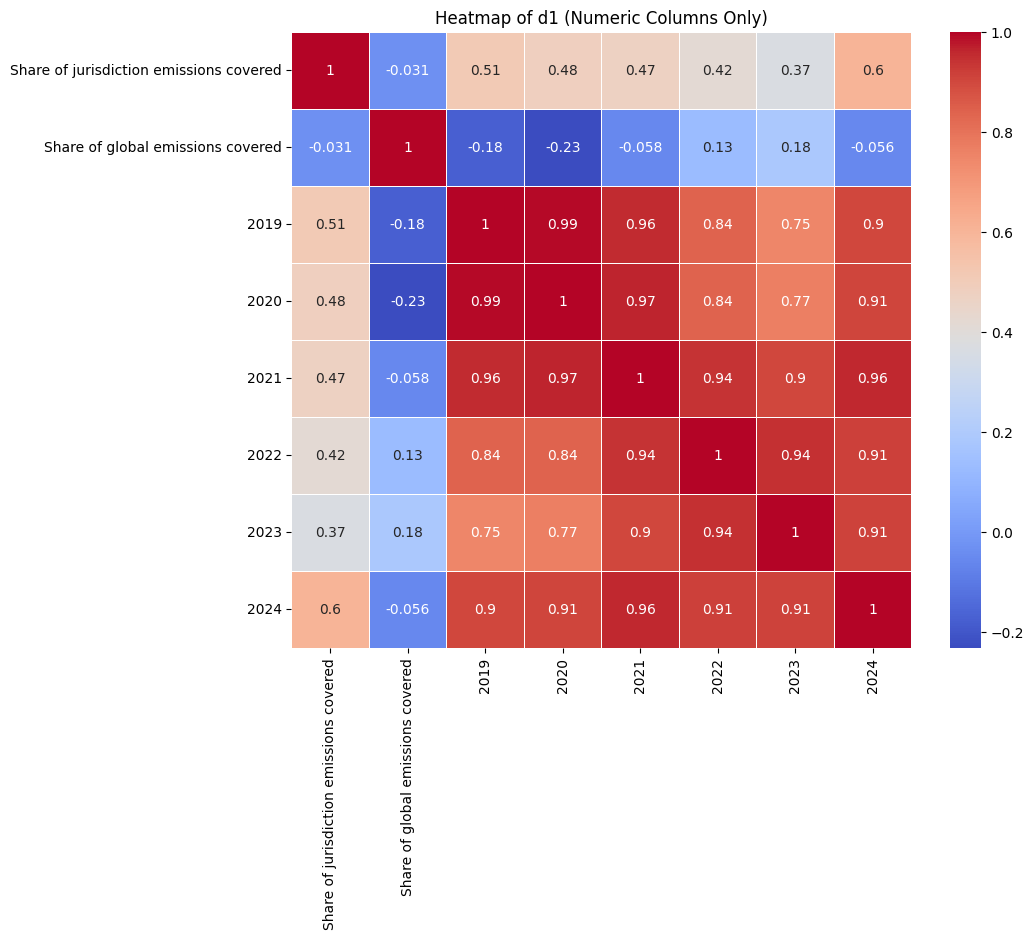

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = d1.select_dtypes(include=['float64', 'int64'])

corr = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of d1 (Numeric Columns Only)')
plt.show()


In [70]:
d1.columns

Index([                                 'Unique ID',
                                  'Instrument name',
                                             'Type',
                                           'Status',
                             'Jurisdiction covered',
          'Share of jurisdiction emissions covered',
                'Share of global emissions covered',
                                 'Price on 1 April',
                                               2019,
                                               2020,
                                               2021,
                                               2022,
                                               2023,
                                               2024,
                                           'Change',
                               'Government revenue',
                                               2018,
                                           '2019.1',
                                           '20

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = d1[[2019, 2020, 2021, 2022, 2023, 2024]]
y = d1['Share of jurisdiction emissions covered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)




Mean Absolute Error (MAE): 2.0522914268431642
Mean Squared Error (MSE): 10.855393750681408
Root Mean Squared Error (RMSE): 3.2947524566621706
R-squared (R²): -474.65016434339174


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

X = d1[['Share of jurisdiction emissions covered',
                'Share of global emissions covered', 2019, 2020, 2021, 2022, 2023, 2024]]
X.columns = X.columns.astype(str)
y = d1['2025']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)


rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r_squared = r2_score(y_test, rf_y_pred)


xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r_squared = r2_score(y_test, xgb_y_pred)


print("Random Forest Metrics:")
print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse}')
print(f'R-squared (R²): {rf_r_squared}')

print("\nXGBoost Metrics:")
print(f'Mean Absolute Error (MAE): {xgb_mae}')
print(f'Mean Squared Error (MSE): {xgb_mse}')
print(f'Root Mean Squared Error (RMSE): {xgb_rmse}')
print(f'R-squared (R²): {xgb_r_squared}')


Random Forest Metrics:
Mean Absolute Error (MAE): 0.09464162483175208
Mean Squared Error (MSE): 0.019900686999169147
Root Mean Squared Error (RMSE): 0.14106979477963788
R-squared (R²): 0.4608336038502785

XGBoost Metrics:
Mean Absolute Error (MAE): 0.054529002460544485
Mean Squared Error (MSE): 0.003960358340794237
Root Mean Squared Error (RMSE): 0.0629313780303136
R-squared (R²): 0.8927025919177228


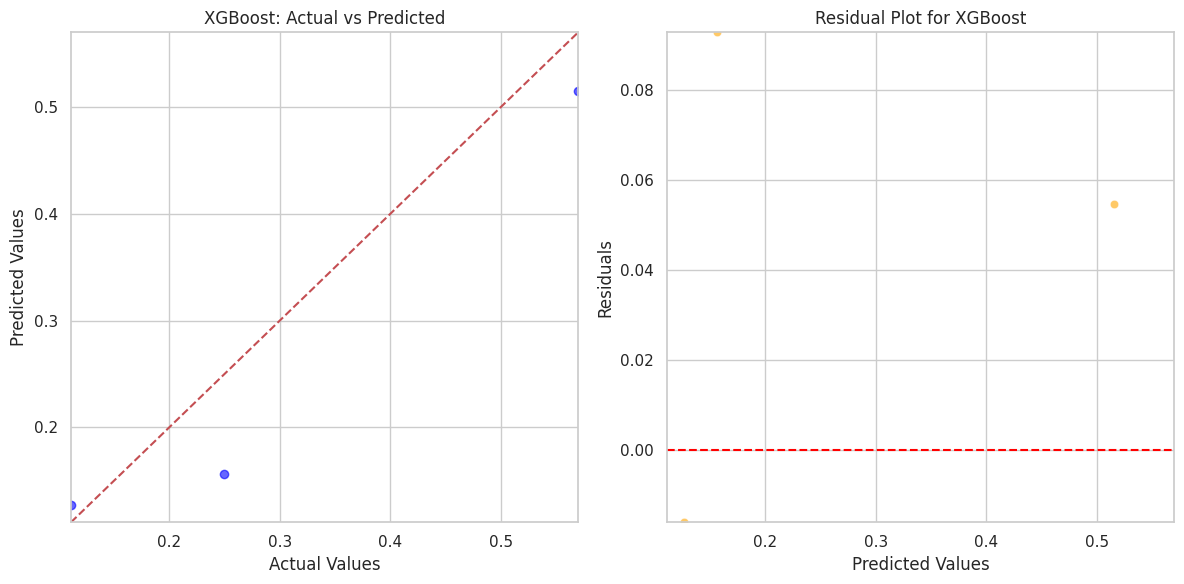

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, xgb_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

plt.subplot(1, 2, 2)
residuals = y_test - xgb_y_pred
sns.scatterplot(x=xgb_y_pred, y=residuals, color='orange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(residuals.min(), residuals.max())

plt.tight_layout()
plt.show()
